In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
beer =  pd.read_csv('brutaltruthsbeers_jing.csv', encoding = "ISO-8859-1")
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 25 columns):
Unnamed: 0          1174 non-null int64
abv                 1174 non-null object
beer_link           1174 non-null object
beer_name           1174 non-null object
beer_style          1174 non-null object
beer_style_match    1174 non-null object
brewery             1174 non-null object
rDev                1174 non-null float64
user_rating         1174 non-null float64
good                1174 non-null object
Color               1174 non-null object
Flavor              1174 non-null int64
Hoppiness           1174 non-null int64
Maltiness           1174 non-null int64
Fruitiness          1174 non-null int64
Body                1174 non-null int64
Sweetness           1174 non-null int64
Custom Flavor       1174 non-null object
Sour                1174 non-null int64
Aroma               1174 non-null object
spicy               1174 non-null int64
bitter              1174 non-null int64

In [3]:
X = beer[["Flavor","Hoppiness","Maltiness","Fruitiness","Body",
          "Sweetness","Sour","spicy","bitter","rDev" ]]
y = beer["good"].values.reshape(-1, 1)
print(X.shape, y.shape)


(1174, 10) (1174, 1)


## Classification

In [4]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
### END SOLUTION

In [5]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier
### END SOLUTION

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
### BEGIN SOLUTION
classifier.fit(X_train, y_train)
### END SOLUTION

/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
### BEGIN SOLUTION
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
### END SOLUTION

Training Data Score: 0.6806818181818182
Testing Data Score: 0.6224489795918368


In [8]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['bad' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad']
First 10 Actual labels: [['bad'], ['bad'], ['good'], ['good'], ['bad'], ['good'], ['good'], ['good'], ['bad'], ['bad']]


## K Nearest Neighbors

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [11]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.933/0.622
k: 3, Train/Test Score: 0.803/0.650


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k: 5, Train/Test Score: 0.773/0.687
k: 7, Train/Test Score: 0.759/0.697
k: 9, Train/Test Score: 0.745/0.711
k: 11, Train/Test Score: 0.734/0.697
k: 13, Train/Test Score: 0.719/0.704
k: 15, Train/Test Score: 0.715/0.694
k: 17, Train/Test Score: 0.720/0.687
k: 19, Train/Test Score: 0.720/0.707


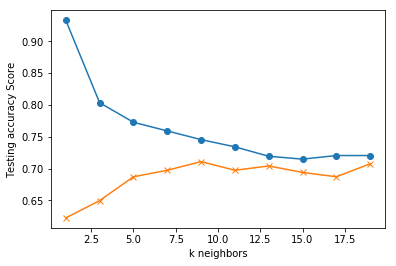

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.697


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [17]:
new_iris_data = beer[["Flavor","Hoppiness","Maltiness","Fruitiness","Body",
          "Sweetness","Sour","spicy","bitter","rDev"]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

['bad' 'bad' 'bad' ..., 'good' 'bad' 'bad']


In [15]:

new_iris_data = [[2,2,2,0,3,2,0,0,0,6.3]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

['good']


In [31]:
beer2 =  pd.read_csv('UserRatingsScrape/rudiecantfail.csv', encoding = "ISO-8859-1")
beer2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 25 columns):
Unnamed: 0          95 non-null int64
abv                 95 non-null object
beer_link           95 non-null object
beer_name           95 non-null object
beer_style          95 non-null object
beer_style_match    95 non-null object
brewery             95 non-null object
rDev                95 non-null float64
user_rating         95 non-null float64
good                95 non-null object
Color               95 non-null object
Flavor              95 non-null int64
Hoppiness           95 non-null int64
Maltiness           95 non-null int64
Fruitiness          95 non-null int64
Body                95 non-null int64
Sweetness           95 non-null int64
Custom Flavor       95 non-null object
Sour                95 non-null int64
Aroma               95 non-null object
spicy               95 non-null int64
bitter              95 non-null int64
csv_name            95 non-null object
style_na

In [33]:
X = beer2[["Flavor","Hoppiness","Maltiness","Fruitiness","Body",
          "Sweetness","Sour","spicy","bitter","rDev" ]]
y = beer2["good"].values.reshape(-1, 1)
print(X.shape, y.shape)

(95, 10) (95, 1)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [35]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [36]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.542
k: 3, Train/Test Score: 0.746/0.458
k: 5, Train/Test Score: 0.732/0.458
k: 7, Train/Test Score: 0.676/0.375
k: 9, Train/Test Score: 0.676/0.458
k: 11, Train/Test Score: 0.648/0.500
k: 13, Train/Test Score: 0.620/0.625
k: 15, Train/Test Score: 0.690/0.625
k: 17, Train/Test Score: 0.648/0.583
k: 19, Train/Test Score: 0.620/0.583


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


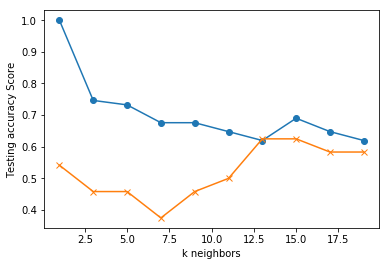

In [37]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()